In [145]:
import pandas as pd

In [146]:
df = pd.read_csv("C:\\Users\\user\\Documents\\IML Hands on\\marketing_campaign.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [147]:
# To check the shape of the dataset

In [148]:
df.shape

(2240, 28)

In [149]:
# To check if there are null values

In [150]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


## Data Preprocessing

In [151]:
# Missing value imputation with Simple Imputer
from sklearn.impute import SimpleImputer
# Imputing missing values with mean
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the "income" column
imputer.fit(df[['Income']])
# Transform and replace the missing values in the "income" column
df['Income'] = imputer.transform(df[['Income']])
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

In [152]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [153]:
# To convert the string data type into numerical data we will import one hot encoder

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
# Select the categorical columns from the DataFrame

In [156]:
cat_columns =['Education','Marital_Status']
cat_df = df[cat_columns]

In [157]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

In [158]:
# Fit the encoder on the categorical data
encoder.fit(cat_df)

OneHotEncoder()

In [159]:
# Transform the categorical data into one-hot encoded representation
encoded_data = encoder.transform(cat_df)

In [160]:
# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(cat_columns))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [161]:
# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(cat_columns, axis=1), encoded_df], axis=1)

In [162]:
df_encoded

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [163]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [164]:
# Define the independent variables
independent_vars = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue','Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO']
# Select the independent variables from the DataFrame
X = df_encoded[independent_vars]

In [165]:
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [166]:
# Identify the dependent variable
dependent_var = 'Response'
y = df_encoded[dependent_var]
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2240, dtype: int64

In [167]:
# Downsampling our target variable for more accuracy

In [168]:
positive_percentage = (df['Response'].sum() / len(df)) * 100
positive_percentage

14.910714285714285

In [169]:
class_counts = df['Response'].value_counts()

# Find the minimum count among the classes
min_count = class_counts.min()

# Downsample each class to the minimum count
downsampled_data = pd.DataFrame()
for class_label in class_counts.index:
    class_data = df[df['Response'] == class_label]
    downsampled_data = downsampled_data.append(class_data.sample(min_count, random_state=42))

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=42)

# Separate the features (X) and the target variable (y)
X_downsampled = downsampled_data.drop('Response', axis=1)
y_downsampled = downsampled_data['Response']

C:\Users\user\AppData\Local\Temp\ipykernel_13404\1787982923.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsampled_data = downsampled_data.append(class_data.sample(min_count, random_state=42))
C:\Users\user\AppData\Local\Temp\ipykernel_13404\1787982923.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  downsampled_data = downsampled_data.append(class_data.sample(min_count, random_state=42))


In [170]:
positive_percentage = (df['Response'].sum() / len(df)) * 100
positive_percentage

14.910714285714285

# Selection of Model 

In [171]:
# Importing Random Forest Classifier

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [173]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [175]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

In [177]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8683035714285714


In [178]:
# Access feature importance scores
importance_scores =rf_classifier.feature_importances_
importance_scores

array([0.05167472, 0.07033432, 0.00644739, 0.01351449, 0.09369093,
       0.06924992, 0.03983365, 0.07278452, 0.04267656, 0.04572612,
       0.05816328, 0.02914648, 0.03387473, 0.04186838, 0.04199139,
       0.04635665, 0.0484522 , 0.01017499, 0.05321571, 0.04140193,
       0.00852999, 0.00117335, 0.        , 0.        , 0.0035385 ,
       0.00155319, 0.008117  , 0.0069695 , 0.01141749, 0.00040395,
       0.00134565, 0.00660733, 0.01080346, 0.01311928, 0.00984815,
       0.00504335, 0.00095142])

In [179]:
for feature, importance in zip(independent_vars, importance_scores):
    print(f"{feature}: {importance}")

Year_Birth: 0.05167472004855084
Income: 0.0703343234172605
Kidhome: 0.006447394628360852
Teenhome: 0.013514488510834845
Recency: 0.0936909345677822
MntWines: 0.06924992307089585
MntFruits: 0.039833654690454
MntMeatProducts: 0.07278452375713415
MntFishProducts: 0.04267656188725542
MntSweetProducts: 0.04572611874712544
MntGoldProds: 0.058163282216933905
NumDealsPurchases: 0.029146475086802195
NumWebPurchases: 0.0338747309087728
NumCatalogPurchases: 0.04186837852088817
NumStorePurchases: 0.04199139160136764
NumWebVisitsMonth: 0.04635665136153003
AcceptedCmp3: 0.04845220432495366
AcceptedCmp4: 0.010174985064097662
AcceptedCmp5: 0.053215714641267724
AcceptedCmp1: 0.04140193366864903
AcceptedCmp2: 0.008529987928309774
Complain: 0.0011733512771455925
Z_CostContact: 0.0
Z_Revenue: 0.0
Education_2n Cycle: 0.0035385016002521686
Education_Basic: 0.0015531911954087708
Education_Graduation: 0.008117003931175499
Education_Master: 0.006969498770582989
Education_PhD: 0.011417486570532003
Marital_Statu

In [180]:
# Visualizing the Driver Rankings

In [181]:
import matplotlib.pyplot as plt

In [182]:
# Sort feature importance scores and feature names in descending order
import numpy as np
independent_vars = np.array(independent_vars)
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = independent_vars[sorted_indices]

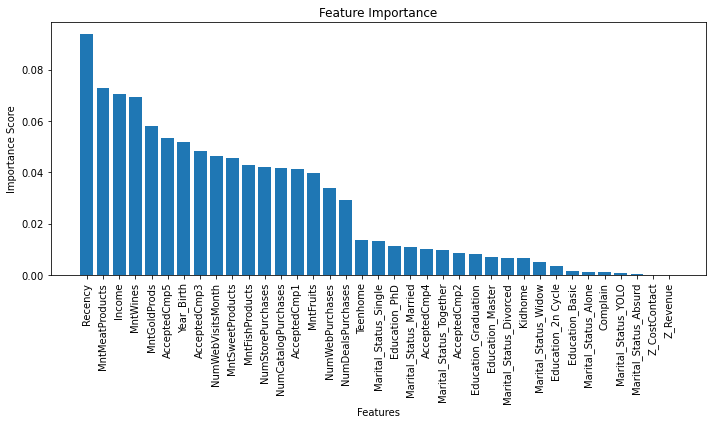

In [183]:
# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), sorted_importance_scores, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [184]:
# Creating a confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

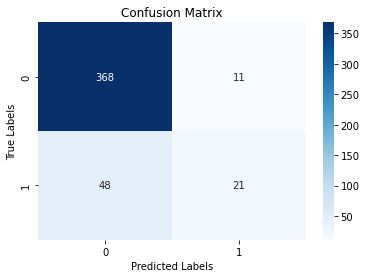

In [185]:
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# Customize the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Display the plot
plt.show()